# Yvettes Workbook

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [105]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [31]:
df = pd.read_pickle('data/data.pickle')

In [32]:
df

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,rfo_description,rfo_number,customer_type,customer_contact,customer_address,...,po_number,order_date,shipped_date,dir_contract_mgr,contract_type,contract_subtype,contract_start_date,contract_end_date,contract_termination_date,sales_fact_number
981291,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",2657.25,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674865
981292,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3053.83,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674866
981293,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3748.07,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674867
981294,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3748.07,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674868
981295,2021,Texas Department of Public Safety,"Cisco Systems, Inc.",3748.07,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,State Agency,Accounts Payable,Po Box 4087,...,21P0008145,03/02/2021,05/09/2021,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2022,07/03/2023,48674869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367053,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",22156.38,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911606
7367054,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",9155.50,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911607
7367055,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",44331.09,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911608
7367056,2023,Lamar Consolidated Independent School District,"Cisco Systems, Inc.",8667.24,DIR-TSO-4167,Cisco Branded Products and Related Services,DIR-TSO-TMP-425,K-12,Accounts Payable,3911 Ave I,...,71009590,06/15/2022,10/30/2022,Tiffanay Waller,Networking Equipment,Networking Equipment,07/03/2018,07/03/2023,07/03/2023,55911609


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378523 entries, 981291 to 7367057
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   fiscal_year                378523 non-null  int64  
 1   customer_name              378523 non-null  object 
 2   vendor_name                378523 non-null  object 
 3   purchase_amount            378523 non-null  float64
 4   contract_number            378523 non-null  object 
 5   rfo_description            378523 non-null  object 
 6   rfo_number                 378523 non-null  object 
 7   customer_type              378523 non-null  object 
 8   customer_contact           369036 non-null  object 
 9   customer_address           378523 non-null  object 
 10  customer_city              378523 non-null  object 
 11  customer_state             378523 non-null  object 
 12  customer_zip               378523 non-null  object 
 13  vendor_contact         

In [34]:
df.isnull().sum()

fiscal_year                     0
customer_name                   0
vendor_name                     0
purchase_amount                 0
contract_number                 0
rfo_description                 0
rfo_number                      0
customer_type                   0
customer_contact             9487
customer_address                0
customer_city                   0
customer_state                  0
customer_zip                    0
vendor_contact                 20
vendor_hub_type                 0
vendor_address                  0
vendor_city                     0
vendor_state                    0
vendor_zip                      0
reseller_name                2531
reseller_hub_type               0
reseller_address             3014
reseller_city                3014
reseller_state               3014
reseller_zip                 3014
reseller_phone               3077
report_received_month           0
purchase_month                  0
brand_name                      0
order_quantity

In [35]:
df.shape

(378523, 42)

In [36]:
df.order_date.value_counts()

10/15/2020    4247
09/27/2019    3781
06/25/2016    3100
04/15/2020    3042
06/20/2020    2961
              ... 
05/08/2016       1
05/14/2014       1
04/01/2018       1
07/18/2017       1
04/18/2015       1
Name: order_date, Length: 2434, dtype: int64

In [37]:
df[['order_date','shipped_date','purchase_amount','purchase_month']].sort_values(by='order_date')

,order_date,shipped_date,purchase_amount,purchase_month
3220324,01/01/2016,01/01/2016,1800.00,201601
3220806,01/01/2016,01/01/2016,1600.00,201601
3220805,01/01/2016,01/01/2016,1600.00,201601
3220804,01/01/2016,01/01/2016,1400.00,201601
3220803,01/01/2016,01/01/2016,1600.00,201601
...,...,...,...,...
5444236,12/31/2020,03/18/2021,9232.20,202103
5444237,12/31/2020,03/18/2021,4094.28,202103
5444224,12/31/2020,03/18/2021,5168.70,202103
6754736,12/31/2021,01/04/2022,369.89,202201


In [38]:
columns = df.columns.to_list()

In [39]:
for i in columns:
    print(f'--------{i}-------')
    print(df[i].value_counts())
    print('___________________')
    

--------fiscal_year-------
2020    69862
2019    55479
2021    51577
2016    50376
2022    40900
2018    37279
2015    37045
2017    16197
2023    12554
2014     7254
Name: fiscal_year, dtype: int64
___________________
--------customer_name-------
Texas Health and Human Services Commission        29434
Texas Department of Information Resources         21602
Brownsville Independent School District           13607
City of Austin                                    12331
Harris County                                      8335
                                                  ...  
Huffman Independent School District                   1
San Jacinto College District                          1
City of Shoreacres                                    1
Clyde Consolidated Independent School District        1
City of Odessa                                        1
Name: customer_name, Length: 1300, dtype: int64
___________________
--------vendor_name-------
Cisco Systems, Inc.    378523
Name: vendo

07/03/2018    230209
05/05/2014    148314
Name: contract_start_date, dtype: int64
___________________
--------contract_end_date-------
07/03/2022    205351
07/04/2018    148314
07/03/2023     24858
Name: contract_end_date, dtype: int64
___________________
--------contract_termination_date-------
07/03/2023    230209
07/04/2018    148314
Name: contract_termination_date, dtype: int64
___________________
--------sales_fact_number-------
48674865    1
42192460    1
42192469    1
42192468    1
42192467    1
           ..
35153036    1
35153035    1
35153034    1
35153033    1
55911610    1
Name: sales_fact_number, Length: 378523, dtype: int64
___________________


**Customer names** include counties seems interesting to maybe seperate by county or school district 
A better way to group would be by **customer type**
```python
--------customer_type-------
K-12                124633
Local Government    120145
State Agency         73068
Higher Ed            60026
Assistance Org         576
Other                   45
Out of State            30
```

Numeric data: **purchase amount**, **order quantity**,  **unit_price**

Question Top sales by customers city use **customer city** or **customer zip**
Question top sales by hub type?

-I would like to use order date as the index

_info to take out 
'sales_fact_number'
'contract_type',
'po_number',
'invoice_number',
'reseller_phone',
'reseller_address',
'vendor_zip',
'vendor_city', 'vendor_state', 'vendor_address', 'vendor_hub_type','vendor_contact',
 'customer_address',
 'rfo_description',
 'rfo_number',

In [40]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['fiscal_year', 'customer_name', 'vendor_name', 'purchase_amount',
       'contract_number', 'rfo_description', 'rfo_number', 'customer_type',
       'customer_contact', 'customer_address', 'customer_city',
       'customer_state', 'customer_zip', 'vendor_contact', 'vendor_hub_type',
       'vendor_address', 'vendor_city', 'vendor_state', 'vendor_zip',
       'reseller_name', 'reseller_hub_type', 'reseller_address',
       'reseller_city', 'reseller_state', 'reseller_zip', 'reseller_phone',
       'report_received_month', 'purchase_month', 'brand_name',
       'order_quantity', 'unit_price', 'invoice_number', 'po_number',
       'order_date', 'shipped_date', 'dir_contract_mgr', 'contract_type',
       'contract_subtype', 'contract_start_date', 'contract_end_date',
       'contract_termination_date', 'sales_fact_number'],
      dtype='object')>

In [41]:
df_explore = df[['fiscal_year', 'customer_name', 'vendor_name', 'purchase_amount',
       'contract_number',   'customer_type',
       'customer_contact', 'customer_city',
       'customer_state', 'customer_zip',  
       
       'reseller_name', 'reseller_hub_type', 
       'reseller_city', 'reseller_state', 'reseller_zip', 
       'report_received_month', 'purchase_month', 'brand_name',
       'order_quantity', 'unit_price',  
       'order_date', 'shipped_date', 'dir_contract_mgr', 
       'contract_subtype', 'contract_start_date', 'contract_end_date',
       'contract_termination_date'] ]

In [42]:
# set date from 2018 till 2022
df_explore = df_explore.loc["2018":]

In [13]:
def datetime_type(df,date):
    ''' datetime_type takes in a dataframe and a ready date columne and reassigns the date to the datetime type
    returns df'''
    # save into dataframe
    df[date] = pd.to_datetime(df[date])
    return df

def distribution( df, var):
    ''' distribution takes in a dataframe and variable and returns a histoplot 
    that  display the distirbution of the variable'''
    # use histplot
    sns.histplot(df[var])
    #show plot
    plt.show();


def set_date_to_index(df, date):
    ''' set_date_to_index takes in a dataframe and string date and set the index of data frame to the index
    returns altered data frame'''
    # Sort rows by the date and then set the index as that date
    df = df.set_index(date).sort_index()
    return df

def add_date_column_string(df,column_name, string='%B'):
    ''' add_date_column takes in a df:data frame and a time frame method run_method: defaulted to %B  month_name()
    and returns a dataframe wiht a new column,'''
    # save into data frame
    df[column_name]=df.index.strftime(string)
    
    return df

def multiply_columns_addto_df(df, column_name, var1, var2):
    ''' multiply_columns_addto_df takes in a dataframe and multiplies two of its variables and sa
    returs'''
    # save into data frame
    df[column_name]= df[var1]* df[var2]
    return df

def fillna(df):
    '''fill na takes in a dataframe and fill in the nans/nulls'''
    # fill in nulls
    df.fillna(0, inplace=True)
    return df

In [46]:
# set order date to date time index
df_explore = datetime_type(df_explore,'order_date')
df_explore = set_date_to_index(df_explore, 'order_date')


In [47]:
df_explore.shape

(376192, 26)

In [48]:
df_explore

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,customer_type,customer_contact,customer_city,customer_state,customer_zip,...,purchase_month,brand_name,order_quantity,unit_price,shipped_date,dir_contract_mgr,contract_subtype,contract_start_date,contract_end_date,contract_termination_date
order_date,,,,,,,,,,,,,,,,,,,,,
2014-05-06,2014,Carroll Independent School District,"Cisco Systems, Inc.",8656.20,DIR-TSO-2542,K-12,Randy Stuart,Southlake,TX,76092,...,201406,Cisco Systems,2.0,4328.10,06/17/2014,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2014-05-06,2014,Carroll Independent School District,"Cisco Systems, Inc.",2882.00,DIR-TSO-2542,K-12,Randy Stuart,Southlake,TX,76092,...,201406,Cisco Systems,4.0,720.50,06/17/2014,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2014-05-06,2014,Carroll Independent School District,"Cisco Systems, Inc.",24071.04,DIR-TSO-2542,K-12,Randy Stuart,Southlake,TX,76092,...,201406,Cisco Systems,4.0,6017.76,06/17/2014,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2014-05-06,2014,Carroll Independent School District,"Cisco Systems, Inc.",268.55,DIR-TSO-2542,K-12,Randy Stuart,Southlake,TX,76092,...,201406,Cisco Systems,1.0,268.55,06/17/2014,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2014-05-06,2014,Carroll Independent School District,"Cisco Systems, Inc.",4486.76,DIR-TSO-2542,K-12,Randy Stuart,Southlake,TX,76092,...,201406,Cisco Systems,2.0,2243.38,06/17/2014,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,2023,Harlingen Waterworks System,"Cisco Systems, Inc.",2469.24,DIR-TSO-4167,Local Government,Accounts Payable,HARLINGEN,TX,78551,...,202211,Cisco,2.0,1234.62,11/29/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2023,07/03/2023
2022-11-28,2023,City of San Antonio,"Cisco Systems, Inc.",430.00,DIR-TSO-4167,Local Government,Accounts Payable,San Antonio,TX,78283,...,202211,Cisco,2.0,215.00,11/29/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2023,07/03/2023
2022-11-28,2023,City of Duncanville,"Cisco Systems, Inc.",525.78,DIR-TSO-4167,Local Government,Accounts Payable,Duncanville,TX,75116,...,202211,Cisco,6.0,87.63,11/29/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2023,07/03/2023


/var/folders/gl/sb_qsbtn2n58skm07d4xzbwh0000gn/T/ipykernel_26721/2986753322.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df_explore['2022']


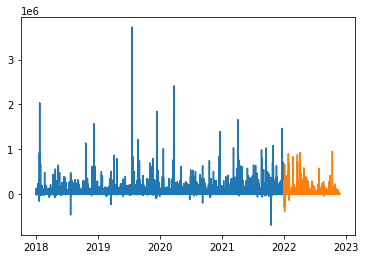

In [53]:
train= df_explore['2018':'2021'] 
test = df_explore['2022']

plt.plot(train.index, train.purchase_amount)
plt.plot(test.index, test.purchase_amount)

In [65]:
train.shape

(233218, 26)

In [69]:
train

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,customer_type,customer_contact,customer_city,customer_state,customer_zip,...,purchase_month,brand_name,order_quantity,unit_price,shipped_date,dir_contract_mgr,contract_subtype,contract_start_date,contract_end_date,contract_termination_date
order_date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,2022,City of Mercedes,"Cisco Systems, Inc.",825.00,DIR-TSO-4167,Local Government,Accounts Payable,Mercedes,TX,78570,...,202203,Cisco,5.0000,165.000000,03/31/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2022,07/03/2023
2021-12-30,2022,City of Mercedes,"Cisco Systems, Inc.",330.00,DIR-TSO-4167,Local Government,Accounts Payable,Mercedes,TX,78570,...,202203,Cisco,2.0000,165.000000,03/31/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2022,07/03/2023
2021-12-30,2022,City of Mercedes,"Cisco Systems, Inc.",330.00,DIR-TSO-4167,Local Government,Accounts Payable,Mercedes,TX,78570,...,202203,Cisco,2.0000,165.000000,03/31/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2022,07/03/2023


In [54]:
train.describe()

,fiscal_year,purchase_amount,reseller_zip,report_received_month,purchase_month,order_quantity,unit_price
count,233218.000000,2.332180e+05,232812.000000,233218.000000,233218.000000,2.332180e+05,2.332180e+05
mean,2019.941493,4.040713e+03,76519.726075,201964.288078,201962.721235,6.360041e+02,1.177489e+03
std,1.224988,2.409718e+04,14775.458235,112.789120,113.042899,1.952423e+05,6.582025e+03
min,2018.000000,-6.967409e+05,2822.000000,201801.000000,201801.000000,-1.273856e+06,0.000000e+00
25%,2019.000000,1.095000e+02,77027.000000,201903.000000,201903.000000,1.000000e+00,5.184000e+01
50%,2020.000000,4.784650e+02,78209.000000,202001.000000,202001.000000,1.000000e+00,2.781000e+02
75%,2021.000000,1.815000e+03,85283.000000,202011.000000,202011.000000,3.000000e+00,7.724400e+02
max,2023.000000,3.723000e+06,98001.000000,202211.000000,202211.000000,9.409319e+07,1.841400e+06


In [56]:
train

,fiscal_year,customer_name,vendor_name,purchase_amount,contract_number,customer_type,customer_contact,customer_city,customer_state,customer_zip,...,purchase_month,brand_name,order_quantity,unit_price,shipped_date,dir_contract_mgr,contract_subtype,contract_start_date,contract_end_date,contract_termination_date
order_date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
2018-01-02,2018,San Benito Consolidated Independent School Dis...,"Cisco Systems, Inc.",63.36,DIR-TSO-2542,K-12,Accounts Payable,San Benito,TX,78586.0,...,201802,Cisco,1.0000,63.360000,02/03/2018,Mario Gutierrez,Networking Equipment,05/05/2014,07/04/2018,07/04/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,2022,City of Mercedes,"Cisco Systems, Inc.",825.00,DIR-TSO-4167,Local Government,Accounts Payable,Mercedes,TX,78570,...,202203,Cisco,5.0000,165.000000,03/31/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2022,07/03/2023
2021-12-30,2022,City of Mercedes,"Cisco Systems, Inc.",330.00,DIR-TSO-4167,Local Government,Accounts Payable,Mercedes,TX,78570,...,202203,Cisco,2.0000,165.000000,03/31/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2022,07/03/2023
2021-12-30,2022,City of Mercedes,"Cisco Systems, Inc.",330.00,DIR-TSO-4167,Local Government,Accounts Payable,Mercedes,TX,78570,...,202203,Cisco,2.0000,165.000000,03/31/2022,Tiffanay Waller,Networking Equipment,07/03/2018,07/03/2022,07/03/2023


# #Explore Questions

# Question 10.What are the trends in sales with school districts as a subgroup (seasonality)?

In [57]:
types = train[['purchase_amount','customer_type']]

In [58]:
types.describe()

,purchase_amount
count,2.332180e+05
mean,4.040713e+03
std,2.409718e+04
min,-6.967409e+05
25%,1.095000e+02
50%,4.784650e+02
75%,1.815000e+03
max,3.723000e+06


In [59]:
types.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233218 entries, 2018-01-02 to 2021-12-31
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchase_amount  233218 non-null  float64
 1   customer_type    233218 non-null  object 
dtypes: float64(1), object(1)
memory usage: 5.3+ MB


In [60]:
types.customer_type.value_counts()

K-12                80203
Local Government    71494
State Agency        40964
Higher Ed           40004
Assistance Org        488
Other                  41
Out of State           24
Name: customer_type, dtype: int64

### create subgroups

In [61]:
k_12= types[types["customer_type"]=='K-12']

In [62]:
local_gov = types[types["customer_type"]=='Local Government']

In [63]:
state_agency = types[types["customer_type"]=='State Agency']

In [64]:
higher_ed = types[types["customer_type"]=='Higher Ed']

In [71]:
subgroups = ['k_12','local_gov','state_agency','higher_ed ']

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

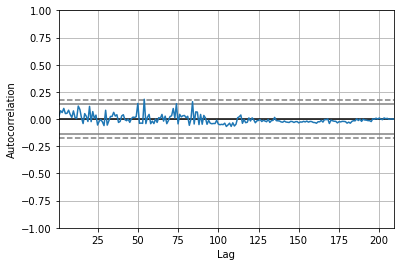

In [79]:
# autocorrelation for k-12
pd.plotting.autocorrelation_plot(k_12.resample('W').mean())



<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

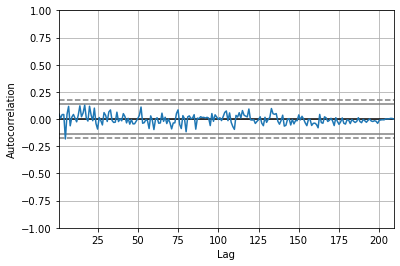

In [80]:
# autocorrolation for higer_Ed
pd.plotting.autocorrelation_plot(higher_ed.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

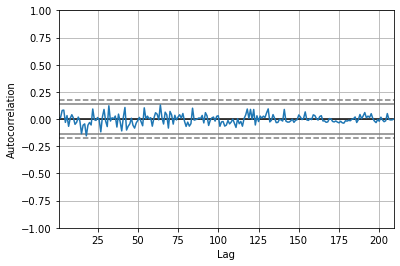

In [81]:
# autorcorrelation for state agency
pd.plotting.autocorrelation_plot(state_agency.resample('W').mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

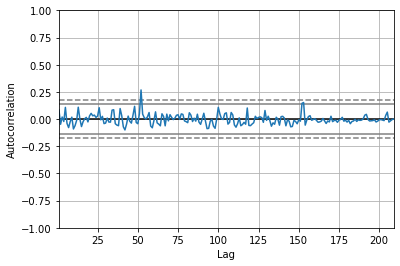

In [91]:
# auto correlation for local_gov
pd.plotting.autocorrelation_plot(local_gov.resample('W').mean())

<AxesSubplot:xlabel='order_date'>

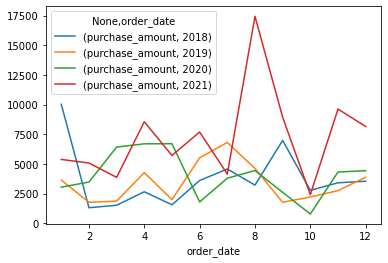

In [92]:
k_12.groupby([k_12.index.year, k_12.index.month]).mean().unstack(0).plot()

<AxesSubplot:xlabel='order_date'>

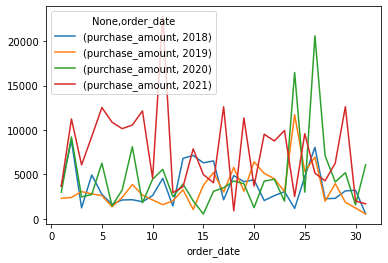

In [93]:
k_12.groupby([k_12.index.year, k_12.index.day]).mean().unstack(0).plot()

<AxesSubplot:xlabel='order_date,order_date'>

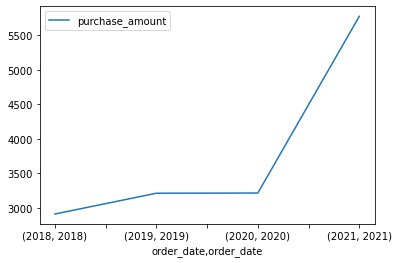

In [96]:
k_12.groupby([k_12.index.year, k_12.index.year]).mean().plot()

In [102]:
y = k_12.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

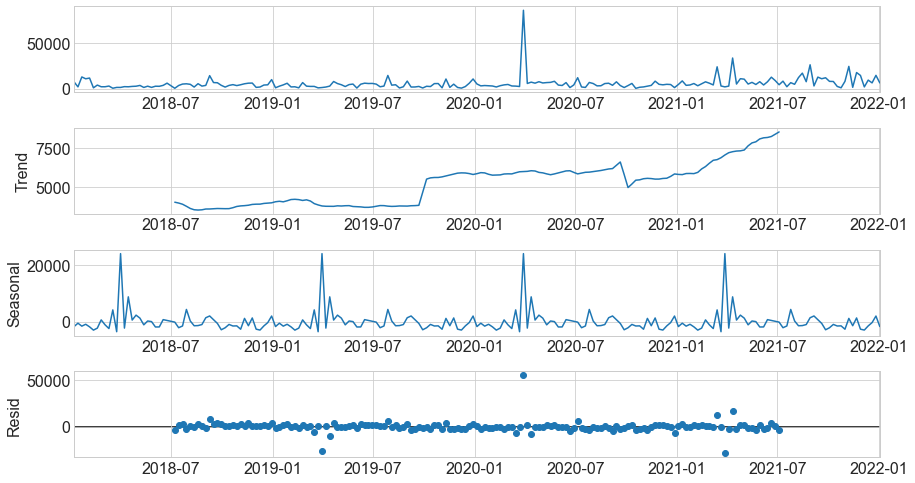

In [106]:
result.plot()
None

There seems to be some seasonality to the k-12 subgroup. Horray!!

In [114]:
def get_timeseries_plus(df):
    print(pd.plotting.autocorrelation_plot(df.resample('W').mean()))
    print (df.groupby([df.index.year, df.index.month]).mean().unstack(0).plot())
    print(df.groupby([df.index.year, df.index.day]).mean().unstack(0).plot())
    y = df.resample('W').mean()

    result = sm.tsa.seasonal_decompose(y)
    print(result.plot())
  

# Question Is there seasonality for higher education subgroup

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Figure(936x504)


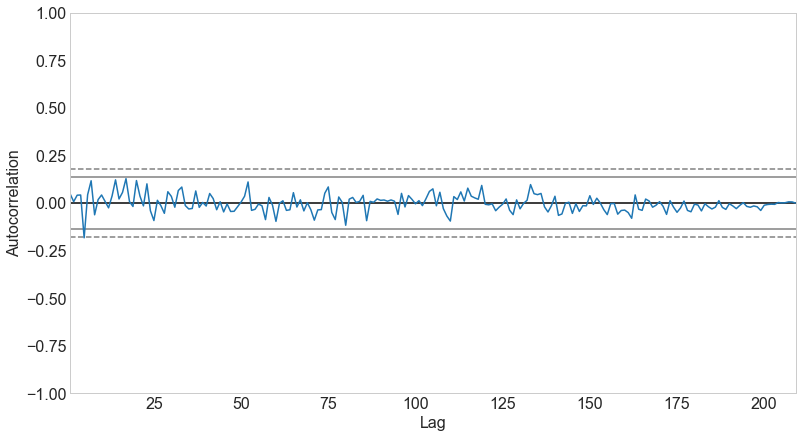

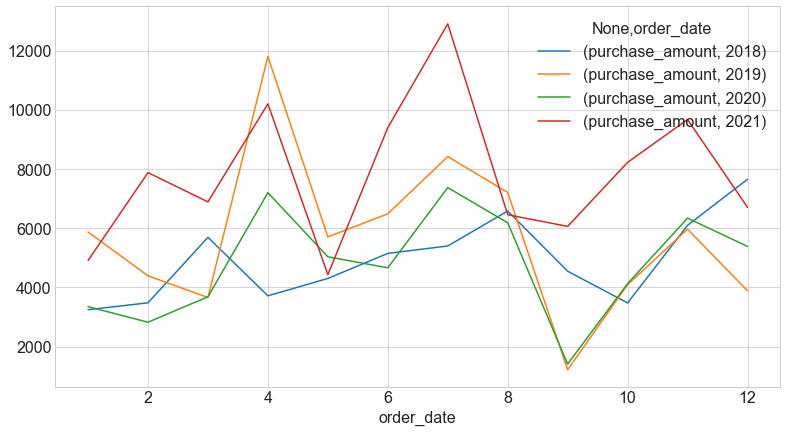

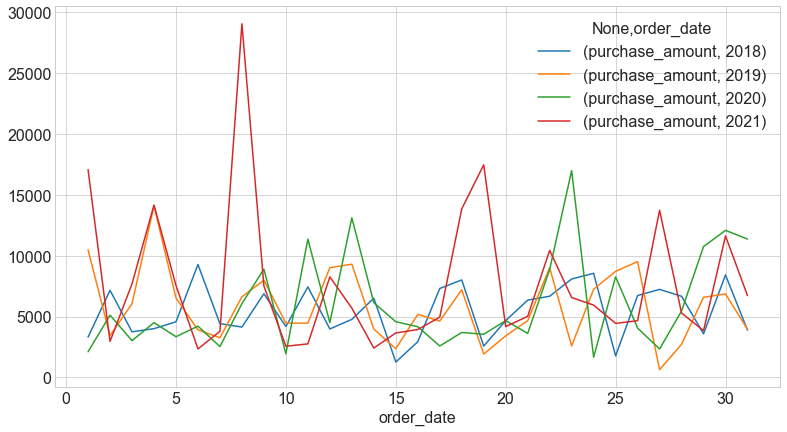

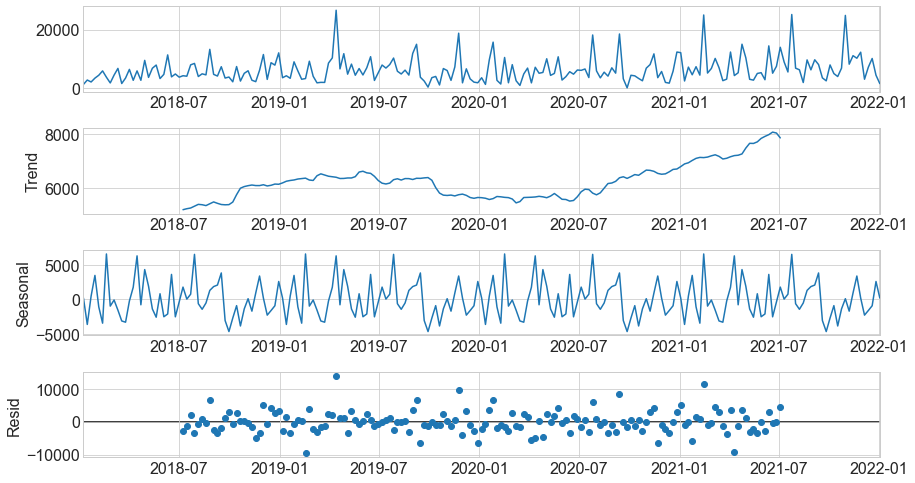

In [115]:
get_timeseries_plus(higher_ed)

There seems to be seasonality by higher education

# Question Is there seasonlity by local government ?

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Figure(936x504)


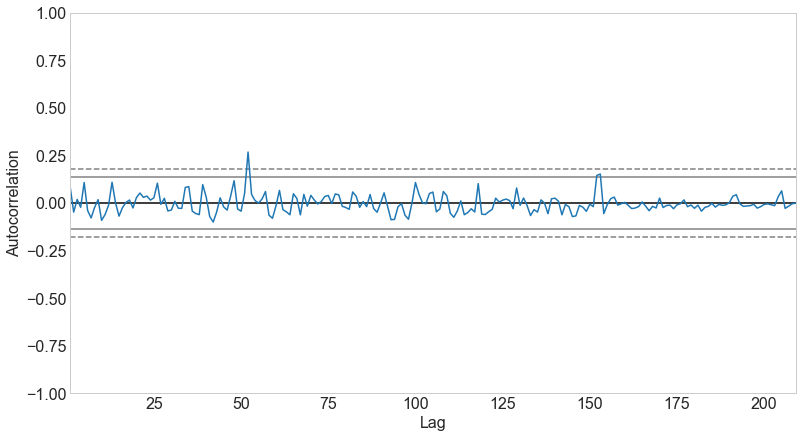

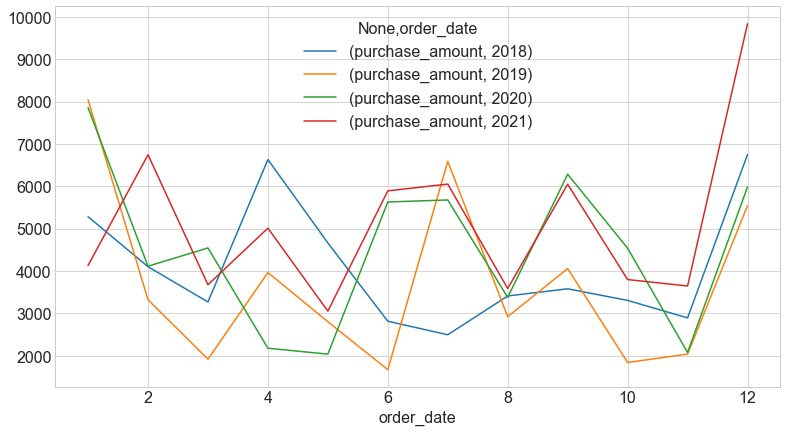

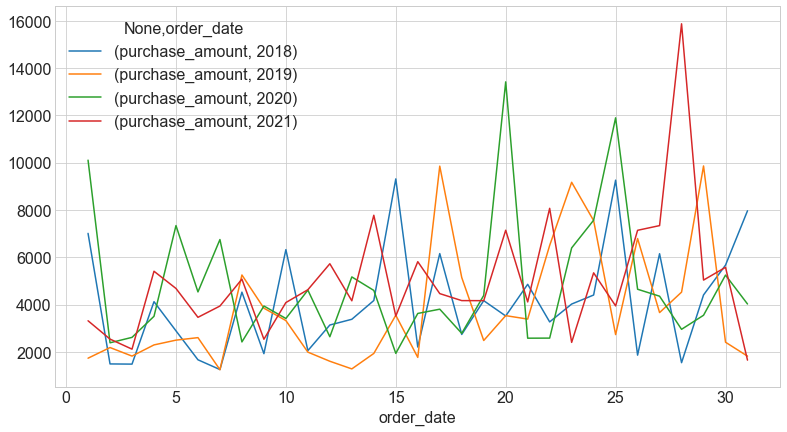

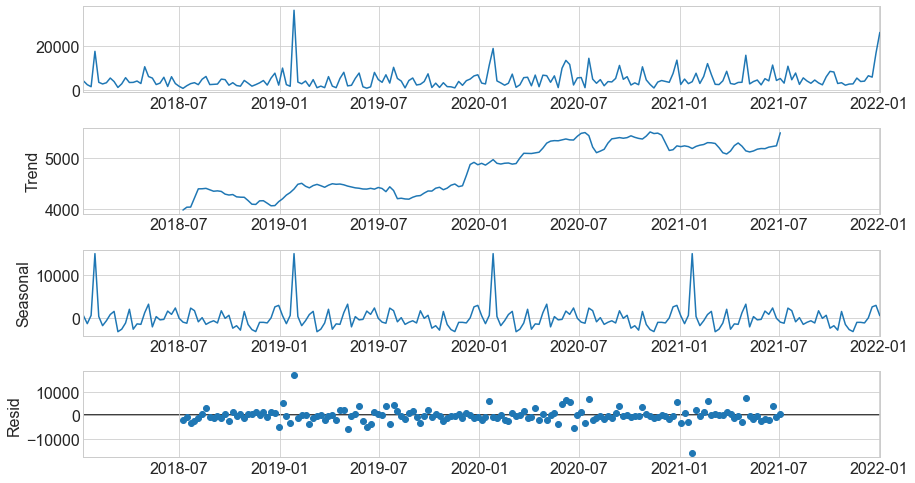

In [117]:
get_timeseries_plus(local_gov)

There seems to be seasonality by local government

# Question Is there seasonality by state agency subgroup?

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Figure(936x504)


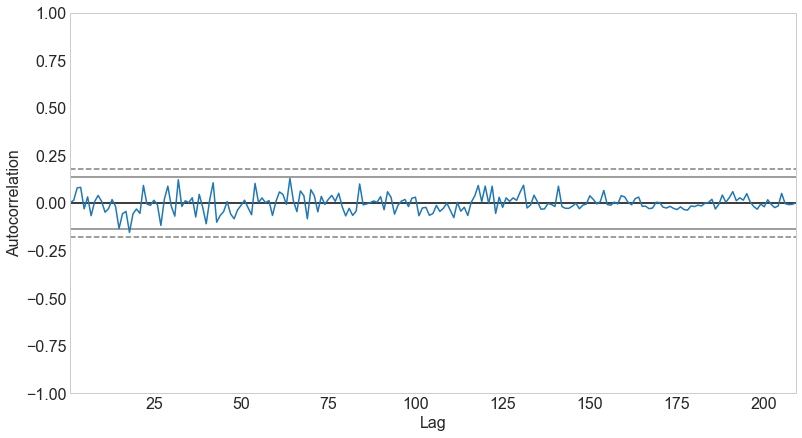

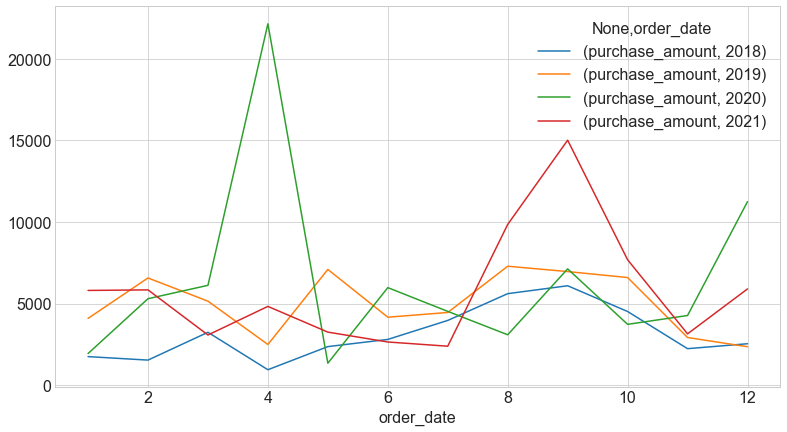

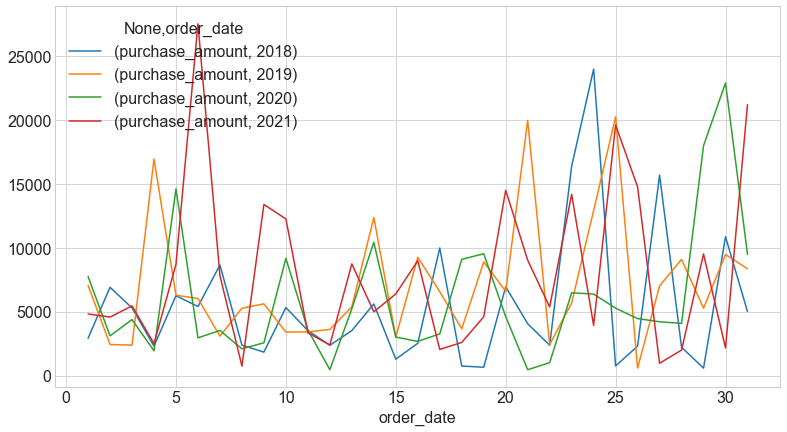

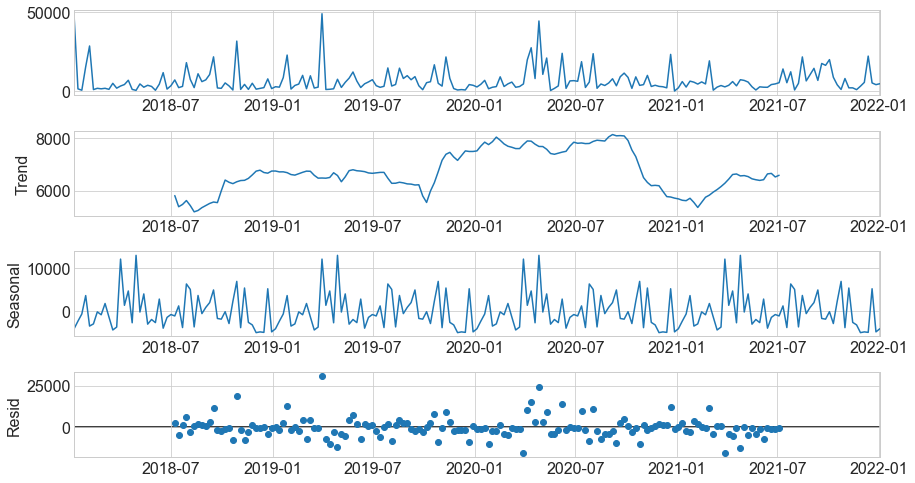

In [119]:
get_timeseries_plus(state_agency)

There seems to be seasonality by state agency!! yay!

In [ ]:
# Question top customer by index